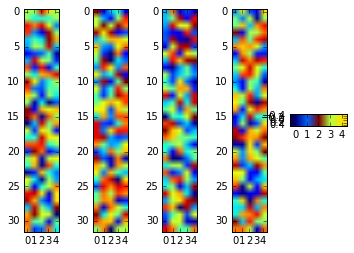

In [14]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt 

df = np.random.rand( 129, 5 )

length = 32

for index, start_pos in enumerate( range( 0, len( df ), length ) ):
    plt.subplot( 1, 5, index + 1 )
    plt.imshow( df[ start_pos : start_pos + length , : ] )

In [9]:
print list( range( 0, len( df ), length ) ) 


[0, 32, 64, 96, 128]


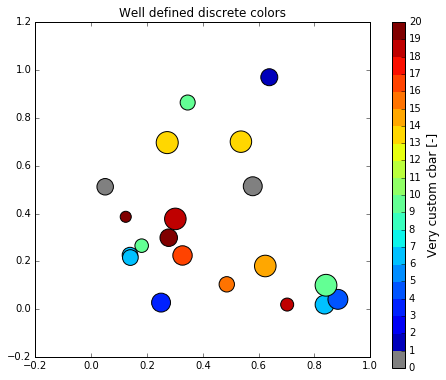

In [17]:
import matplotlib as mpl

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = np.random.rand(20)
y = np.random.rand(20)
tag = np.random.randint(0,20,20)
tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,20,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12)

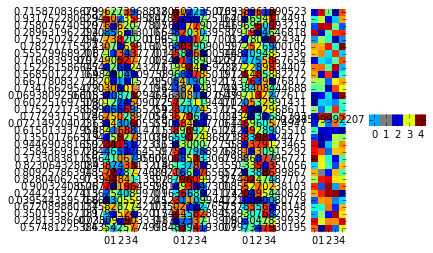

In [22]:
df = np.random.rand( 129, 5 )

length = 32
ii = range( 0, len( df ), length )

for index, start_pos in enumerate( ii ):
    my_dat = df[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    plt.yticks( range( len( my_dat ) ), my_dat[ : , 0 ] )

In [37]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 

df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

# data transformation 

my_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 

df = df[ my_cols ] 

df[ 'tm' ] = df[ 'tm' ] - 39.93
df[ 'kcat' ] = np.log10( df[ 'kcat' ] / 880. ) 
df[ 'km' ] = np.log10( df[ 'km' ] / 5. ) 
df[ 'kcatkm' ] = np.log10( df[ 'kcatkm' ] / 174000. ) 

# sanity check 
print df.loc[ 'BglB' ]
print df.loc[ 'Q19A' ]
print df.loc[ 'R240A' ]

df.describe( include='all' ) 

expression    1.0
tm            0.0
kcat          0.0
km            0.0
kcatkm        0.0
Name: BglB, dtype: float64
expression    1.000000
tm                 NaN
kcat               NaN
km                 NaN
kcatkm       -4.199157
Name: Q19A, dtype: float64
expression    1.000000
tm           -0.030000
kcat          1.097344
km            0.590173
kcatkm        0.512085
Name: R240A, dtype: float64


,expression,tm,kcat,km,kcatkm
count,129.000000,69.000000,80.000000,80.000000,92.000000
mean,0.713178,-0.590725,-0.836934,0.172412,-1.449682
std,0.454041,1.618392,0.948346,0.391784,1.515885
min,0.000000,-5.680000,-2.944483,-1.096910,-4.240549
25%,0.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN
max,1.000000,2.720000,1.097344,1.251297,0.955350


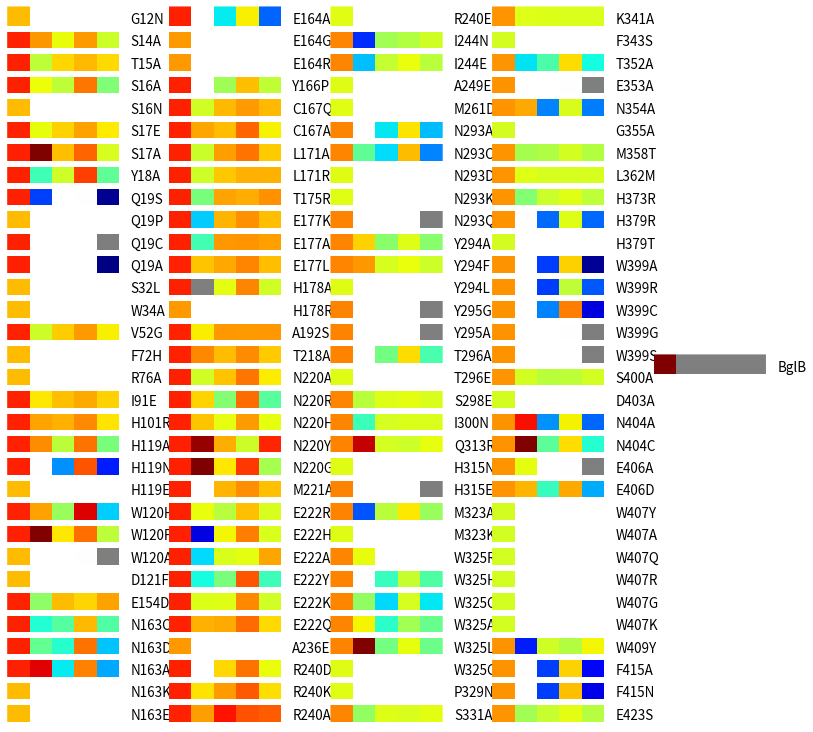

In [55]:
length = 32
ii = range( 0, len( df ), length )

plt.figure( figsize=(14,14) )
for index, start_pos in enumerate( ii ):
    my_dat = df.ix[ start_pos : start_pos + length , : ]
    plt.subplot( 1, len( ii ), index + 1 )
    plt.box( 0 ) 
    plt.tick_params( length=0 )
    plt.xticks([]); plt.yticks([])
    plt.imshow( my_dat, interpolation='none', cmap=cmap )
    #plt.yticks( range( len( my_dat ) ), my_dat.index )
    
    font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
    for i, r in enumerate( my_dat.index ):
        plt.text( 5, i+0.25, r, fontdict=font )
        plt.plot( [ -.5, len( ii ) + .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) # cell borders